## Jorge P. Rodríguez, 2023

In [1]:
import pandas as pd
import pylab as plt
plt.style.use('classic')
import numpy as np
import math

In [2]:
df = pd.read_excel('N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx',sheet_name=None)
#File obtained from National Snow and Ice Data Center http://nsidc.org

In [3]:
df

OrderedDict([('Baffin-Area-km^2',
                  Unnamed: 0      January Unnamed: 2     February Unnamed: 4        March  \
              0          NaN         area       rank         area       rank         area   
              1          NaN          NaN        NaN          NaN        NaN          NaN   
              2       1978.0          NaN        NaN          NaN        NaN          NaN   
              3       1979.0       840499         13       922075          6  1.03114e+06   
              4       1980.0       870925         19       958526          8  1.03641e+06   
              5       1981.0       928644         26  1.02367e+06         16       951153   
              6       1982.0       853589         14  1.13231e+06         33  1.21156e+06   
              7       1983.0  1.34436e+06         42   1.4118e+06         42  1.44851e+06   
              8       1984.0  1.35269e+06         43  1.49335e+06         44  1.37413e+06   
              9       1985.0  1.1192

In [4]:
df.keys()

odict_keys(['Baffin-Area-km^2', 'Baffin-Extent-km^2', 'Barents-Area-km^2', 'Barents-Extent-km^2', 'Beaufort-Area-km^2', 'Beaufort-Extent-km^2', 'Bering-Area-km^2', 'Bering-Extent-km^2', 'CanadianArchipelago-Area-km^2', 'CanadianArchipelago-Extent-km^2', 'Central-Arctic-Area-km^2', 'Central-Arctic-Extent-km^2', 'Chukchi-Area-km^2', 'Chukchi-Extent-km^2', 'East-Siberian-Area-km^2', 'East-Siberian-Extent-km^2', 'Greenland-Area-km^2', 'Greenland-Extent-km^2', 'Hudson-Area-km^2', 'Hudson-Extent-km^2', 'Kara-Area-km^2', 'Kara-Extent-km^2', 'Laptev-Area-km^2', 'Laptev-Extent-km^2', 'Okhotsk-Area-km^2', 'Okhotsk-Extent-km^2', 'St-Lawrence-Area-km^2', 'St-Lawrence-Extent-km^2', 'Documentation'])

In [5]:
df['Baffin-Area-km^2'].head()

,Unnamed: 0,January,Unnamed: 2,February,Unnamed: 4,March,Unnamed: 6,April,Unnamed: 8,May,...,August,Unnamed: 16,September,Unnamed: 18,October,Unnamed: 20,November,Unnamed: 22,December,Unnamed: 24
0,NaN,area,rank,area,rank,area,rank,area,rank,area,...,area,rank,area,rank,area,rank,area,rank,area,rank
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1978.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,606894,42,706099,29
3,1979.0,840499,13,922075,6,1.03114e+06,13,904255,9,789392,...,70360.4,38,36029,36,109448,30,480114,35,743777,32
4,1980.0,870925,19,958526,8,1.03641e+06,14,983828,25,813411,...,59139.5,35,25742.7,16,122165,32,410983,25,688569,24


In [6]:
df['Beaufort-Extent-km^2'].head()

,Unnamed: 0,January,Unnamed: 2,February,Unnamed: 4,March,Unnamed: 6,April,Unnamed: 8,May,...,August,Unnamed: 16,September,Unnamed: 18,October,Unnamed: 20,November,Unnamed: 22,December,Unnamed: 24
0,NaN,extent,rank,extent,rank,extent,rank,extent,rank,extent,...,extent,rank,extent,rank,extent,rank,extent,rank,extent,rank
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1978.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,940219,37,940219,25
3,1979.0,940219,23,940219,29,940219,23.5,940219,26,934965,...,716672,23,625104,22,804376,24,940136,23,940219,25
4,1980.0,940219,23,940219,29,940219,23.5,940219,26,940136,...,742015,26,843395,39,892040,35,940219,37,940219,25


In [7]:
df['Beaufort-Extent-km^2'].tail()

,Unnamed: 0,January,Unnamed: 2,February,Unnamed: 4,March,Unnamed: 6,April,Unnamed: 8,May,...,August,Unnamed: 16,September,Unnamed: 18,October,Unnamed: 20,November,Unnamed: 22,December,Unnamed: 24
42,2018.0,940219,23,940219,29,940219,23.5,940219,26,940219,...,562271,10,503232,14,769780,18,940156,24,940219,25
43,2019.0,940219,23,940219,29,940219,23.5,940219,26,906533,...,394795,5,309560,5,522641,3,877757,3,940219,25
44,2020.0,940219,23,940219,9,940219,23.5,940219,26,940219,...,663055,19,469983,11,779462,20,939041,14,940219,25
45,2021.0,940219,23,940219,29,940219,23.5,940219,26,937694,...,738059,25,544020,16,715057,16,913729,6,940219,25
46,2022.0,940219,23,940219,29,940219,23.5,940219,26,935216,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
months = ['January','February','March','April','May','June'
          ,'July','August','September','October','November','December']
print(len(months))

12


In [9]:
names = ['Baffin-Area-km^2','CanadianArchipelago-Area-km^2','Beaufort-Area-km^2','East-Siberian-Area-km^2',
        'Barents-Area-km^2','Kara-Area-km^2']


In [10]:
data = []
for name in names:
    s = df[name]
    d = []
    for i in range(2010,2022):
        samp = s[s['Unnamed: 0'] == i]
        for m in months:
            d.append(samp[m].iloc[0])
    samp = s[s['Unnamed: 0'] == 2022]
    for m in months[:4]:
        d.append(samp[m].iloc[0])
    
    data.append(d)
            

In [11]:
times = []
for i in range(2010,2022):
    for m in range(1,13):
        times.append(pd.to_datetime(f'{i}-{m}-01'))
for m in range(1,5):
    times.append(pd.to_datetime(f'2022-{m}-01'))
        

In [12]:
print(times,len(times))

[Timestamp('2010-01-01 00:00:00'), Timestamp('2010-02-01 00:00:00'), Timestamp('2010-03-01 00:00:00'), Timestamp('2010-04-01 00:00:00'), Timestamp('2010-05-01 00:00:00'), Timestamp('2010-06-01 00:00:00'), Timestamp('2010-07-01 00:00:00'), Timestamp('2010-08-01 00:00:00'), Timestamp('2010-09-01 00:00:00'), Timestamp('2010-10-01 00:00:00'), Timestamp('2010-11-01 00:00:00'), Timestamp('2010-12-01 00:00:00'), Timestamp('2011-01-01 00:00:00'), Timestamp('2011-02-01 00:00:00'), Timestamp('2011-03-01 00:00:00'), Timestamp('2011-04-01 00:00:00'), Timestamp('2011-05-01 00:00:00'), Timestamp('2011-06-01 00:00:00'), Timestamp('2011-07-01 00:00:00'), Timestamp('2011-08-01 00:00:00'), Timestamp('2011-09-01 00:00:00'), Timestamp('2011-10-01 00:00:00'), Timestamp('2011-11-01 00:00:00'), Timestamp('2011-12-01 00:00:00'), Timestamp('2012-01-01 00:00:00'), Timestamp('2012-02-01 00:00:00'), Timestamp('2012-03-01 00:00:00'), Timestamp('2012-04-01 00:00:00'), Timestamp('2012-05-01 00:00:00'), Timestamp('20

In [13]:
dataout = pd.DataFrame({'Time':times})
for ix,n in enumerate(names):
    dataout[n] = data[ix]

In [14]:
dataout.head()

,Time,Baffin-Area-km^2,CanadianArchipelago-Area-km^2,Beaufort-Area-km^2,East-Siberian-Area-km^2,Barents-Area-km^2,Kara-Area-km^2
0,2010-01-01,731808.124,725652.880,919320.121,1264761.614,390745.695,782025.033
1,2010-02-01,817384.110,737522.776,926676.567,1280044.311,466298.568,848057.017
2,2010-03-01,925220.040,733623.941,926308.537,1285450.976,631909.464,864513.419
3,2010-04-01,877956.517,718422.058,915972.806,1290238.212,588371.486,840263.909
4,2010-05-01,663974.829,686894.418,873825.550,1243308.085,223876.251,743912.542


/home/jorge/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Sea ice extent (km$^2$)')

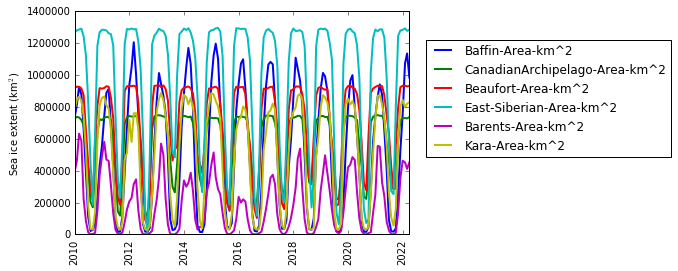

In [15]:
for name in names:
    plt.plot(dataout['Time'],dataout[name],label=name,lw=2)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.8,0.9))
plt.ylabel('Sea ice extent (km$^2$)')

In [16]:
matrix = np.loadtxt('Arctic_region_mask_Meier_AnnGlaciol2007.txt')

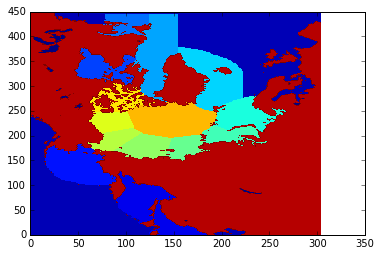

In [17]:
plt.pcolormesh(matrix)

In [18]:
dataout.to_csv('./data/icearea_byzones_timeev.csv',index=False)